# ECE 657A Assignment 2

### Question 2:[60] Parameter Selection and Classification (for dataset B) Classify dataset B using four classifiers: k-NN, Support Vector Machine (with RBF kernel), Random Forests and simple Neural Networks (MLPs). The objective is to experiment with parameter selection in training classifiers and to compare the performance of these well- known classification methods.

The dataset was inspected and it was noticed that it is stored as a comma separated values (csv) file and each value is separated by a comma (,). The file contains no header with the column names. 

The file was taken directly from the file provided and loaded as a pandas dataframe with parameters for the header and the delimiter were specified to None and "," respectively. The first 5 rows can be seen in the table below.

In [33]:
##--Importing necessary libraries
import pandas as pd 
import numpy as np
from scipy import stats

import seaborn as sns

from collections import Counter
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE, SMOTENC

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn import preprocessing, tree, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import graphviz
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

from sklearn.ensemble import RandomForestClassifier

########################33 Importar a Assignemnt 2
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import timeit

###########################
plt.style.use('seaborn-notebook')

##--Disabling the warnings for better notebook visibility
import warnings
warnings.simplefilter('ignore') 

##--Setting SNS palette and parameters
# sns.set(style='dark', palette='Set1')
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 23

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
##--Reading the file
df_dna = pd.read_csv('DataDNA.csv', sep = ',', header = None)
df_dna.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,1,2,1,2,1,2,3,3,3,3,...,3,2,3,4,2,2,2,2,1,1
1,3,3,4,2,1,2,2,4,3,2,...,1,4,3,4,4,4,1,3,4,1
2,4,1,4,4,4,4,1,1,2,1,...,1,2,1,1,4,2,2,4,4,1
3,1,4,1,1,3,3,4,4,3,4,...,1,3,3,4,1,3,3,4,2,-1
4,3,4,4,3,1,1,4,4,4,1,...,3,1,3,2,1,4,2,1,1,-1


In [3]:
df_dna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 58 columns):
0     2200 non-null int64
1     2200 non-null int64
2     2200 non-null int64
3     2200 non-null int64
4     2200 non-null int64
5     2200 non-null int64
6     2200 non-null int64
7     2200 non-null int64
8     2200 non-null int64
9     2200 non-null int64
10    2200 non-null int64
11    2200 non-null int64
12    2200 non-null int64
13    2200 non-null int64
14    2200 non-null int64
15    2200 non-null int64
16    2200 non-null int64
17    2200 non-null int64
18    2200 non-null int64
19    2200 non-null int64
20    2200 non-null int64
21    2200 non-null int64
22    2200 non-null int64
23    2200 non-null int64
24    2200 non-null int64
25    2200 non-null int64
26    2200 non-null int64
27    2200 non-null int64
28    2200 non-null int64
29    2200 non-null int64
30    2200 non-null int64
31    2200 non-null int64
32    2200 non-null int64
33    2200 non-null int64
34    220

1. Preprocess the given data using the Z-score normalization on the data. Justify the choice of Z-score normalization here, as opposed to min-max normalization. Why do you need normalization in general? Justify why you would normally split the test and training set randomly. What is the distribution of the +1,-1 classes in the dataset?[5]

In [4]:
X = df_dna.iloc[:,:-1]
y = df_dna.iloc[:,-1]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    stratify = y, 
                                                    random_state = 1)

# Feature Scaling
sc = StandardScaler()
cols = X.columns 
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=cols)
X_test = pd.DataFrame(sc.transform(X_test), columns=cols)

In [5]:
Counter(y)

Counter({1: 1137, -1: 1063})

## Answer

## 2. Parameter Selection:
### (a) For k-NN you need to evaluate the best value k to use. Using 5-fold cross validation on the training set evaluate k-NN on the values k=[1, 3, 5, 7, , 31]. The following link can be helpful: https://scikit-learn.org/stable/modules/cross_validation.html Plot a figure that shows the relationship between the accuracy and the parameter k. Report the best k in terms of classification accuracy. Explain why you didnt evaluate directly on the test set.

In [6]:
# # Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split
# X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, 
#                                                     test_size = 0.2, 
#                                                     stratify = y_train, 
#                                                     random_state = 1)

In [7]:
k_n = list(range(1,32,2))


def tuning3(model = "KNeighborsClassifier(", parameter="n_neighbors", 
            values=k_n):
    clf_train_acc = []
    clf_val_acc = []
    clf_train_precision = []
    clf_val_precision = []
    clf_train_recall = []
    clf_val_recall = [] 
    scores_accuracy=[]

    for value in values:
        clf_knn_temp = eval(model + parameter + "=" + str(value) + ")")
        scores_accuracy.append(cross_val_score(clf_knn_temp, X_train, y_train, 
                                               cv=5, scoring = 'balanced_accuracy', 
                                               n_jobs = -2 ).mean())
    
    parameter_accuracy_max = values[scores_accuracy.index(max(scores_accuracy))]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(values, scores_accuracy, color = "teal")
   

    # for (x_var, y_err, component) in zip(model_retained_variance, model_err_test, components):      
    ax.annotate(parameter_accuracy_max, xy=(parameter_accuracy_max, scores_accuracy[int((parameter_accuracy_max-1)/2)]), 
               # xytext=(-1.5,5), textcoords='offset points'
               ) 
    print((scores_accuracy[int((parameter_accuracy_max-1)/2)], parameter_accuracy_max))
#     
    
    plt.ylim(0.72, 0.774)
    plt.suptitle("Analyzing " + parameter)
    plt.ylabel("Accuracy")
    plt.xlabel(parameter)
    plt.show()
    
    
    return(parameter_accuracy_max)

(0.7678733031674208, 13)


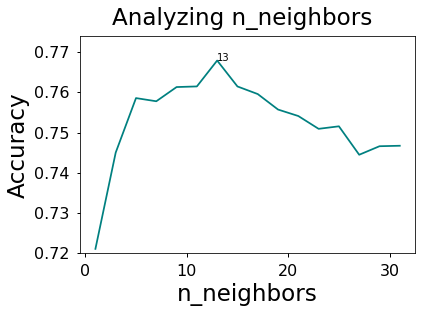

13

In [8]:
n_n = tuning3(model = "KNeighborsClassifier(",
                   parameter = "n_neighbors", values=list(range(1,32,2)))
n_n

### (b) For the RBF kernel SVM, there are two parameters to be decided: the soft margin penalty term "c" and the kernel width parameter "sigma". Again use 5-fold cross validation on the training set to select the parameter "c" from the set [0.1, 0.5, 1, 2, 5, 10, 20, 50] and select the parameter "sigma" from the set [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]. Report the best parameters in terms of classification accuracy including plotting the ROC curves.

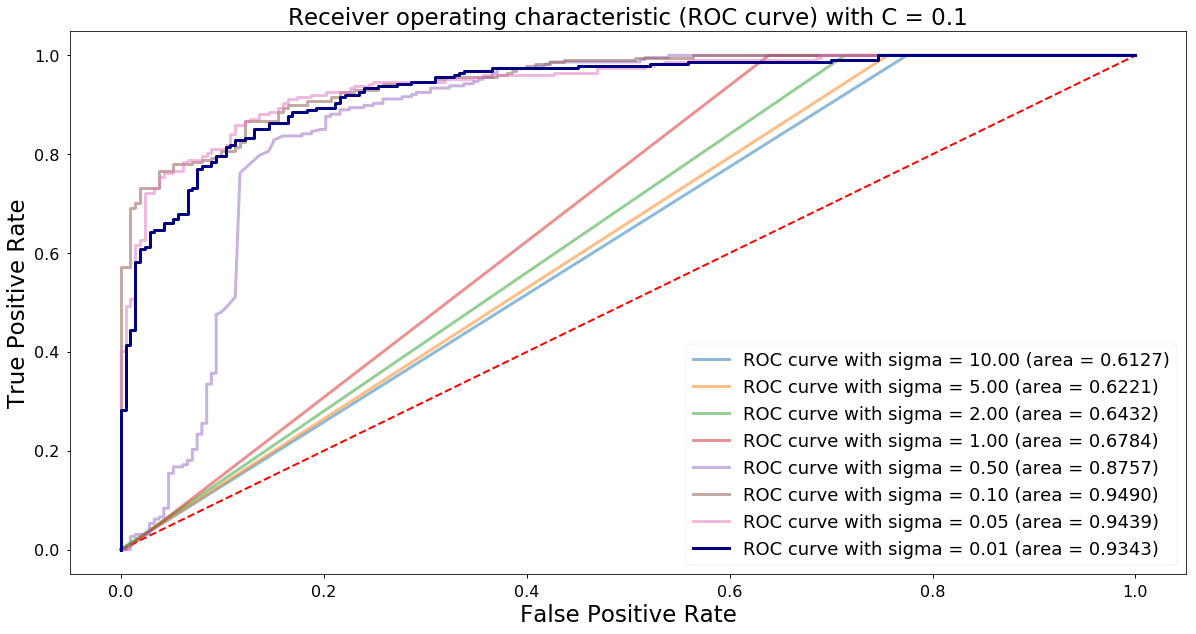

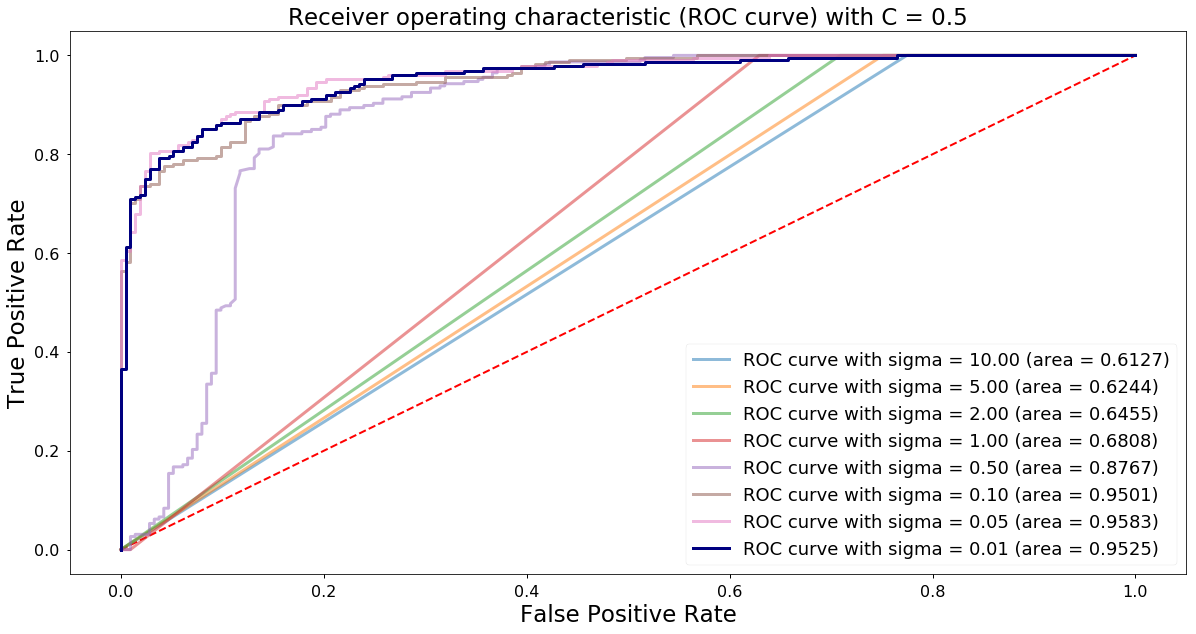

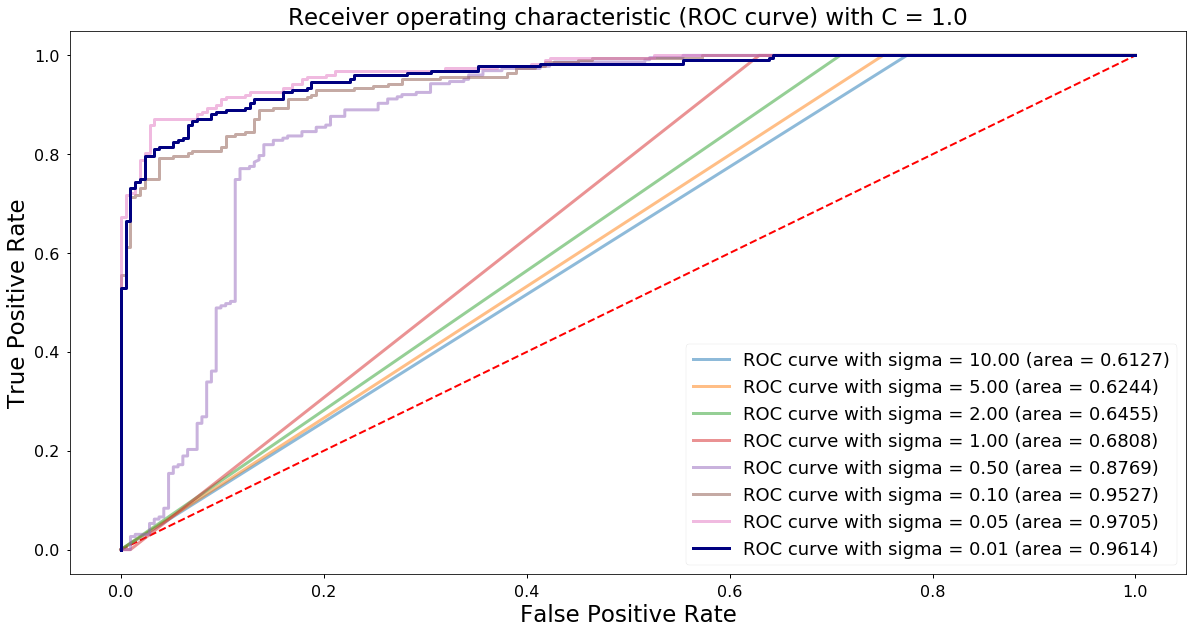

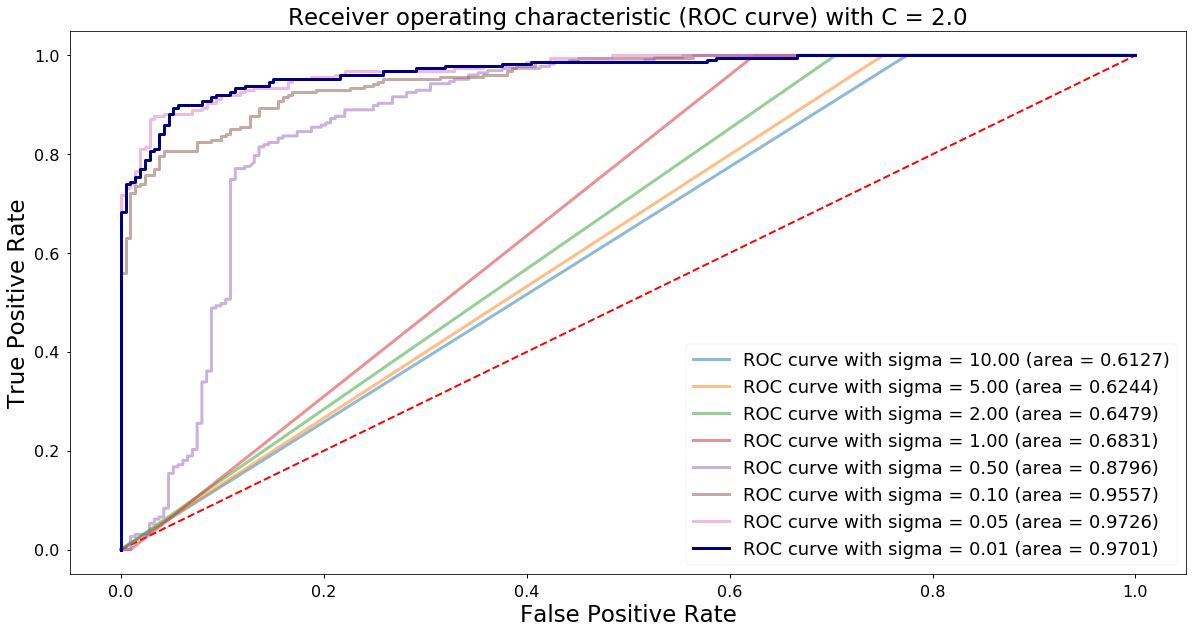

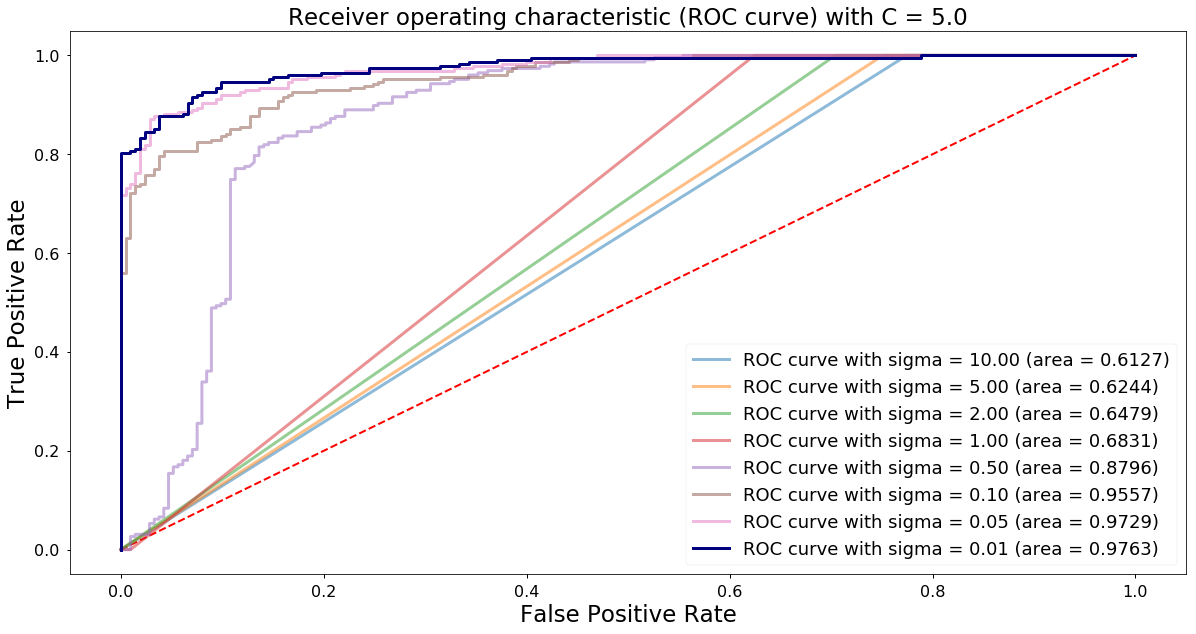

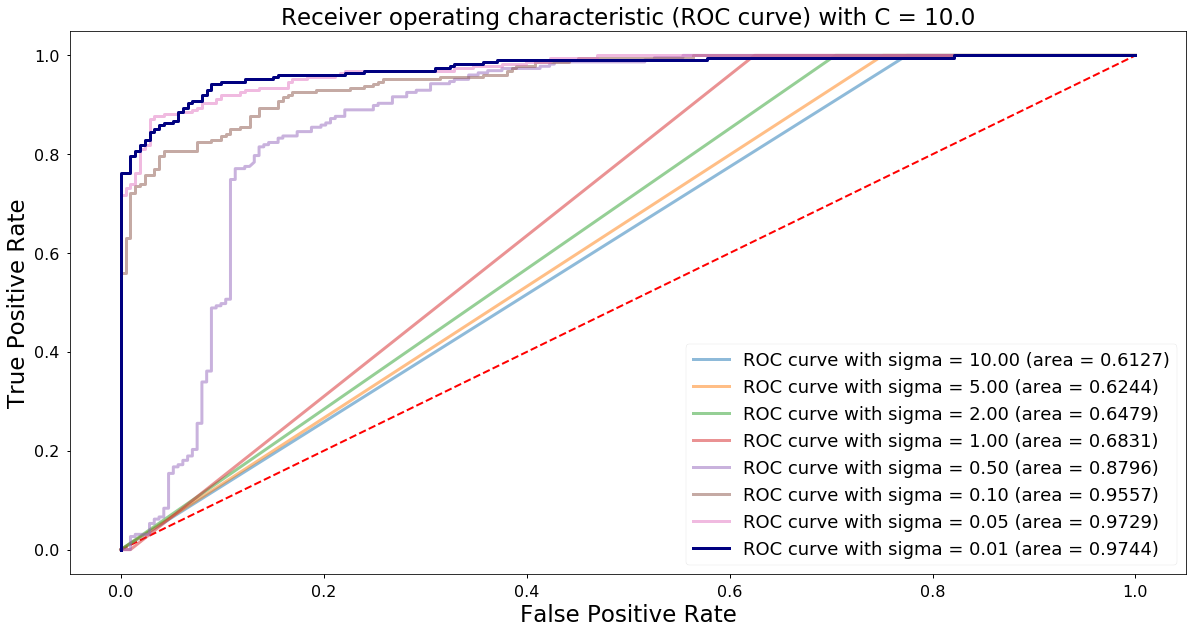

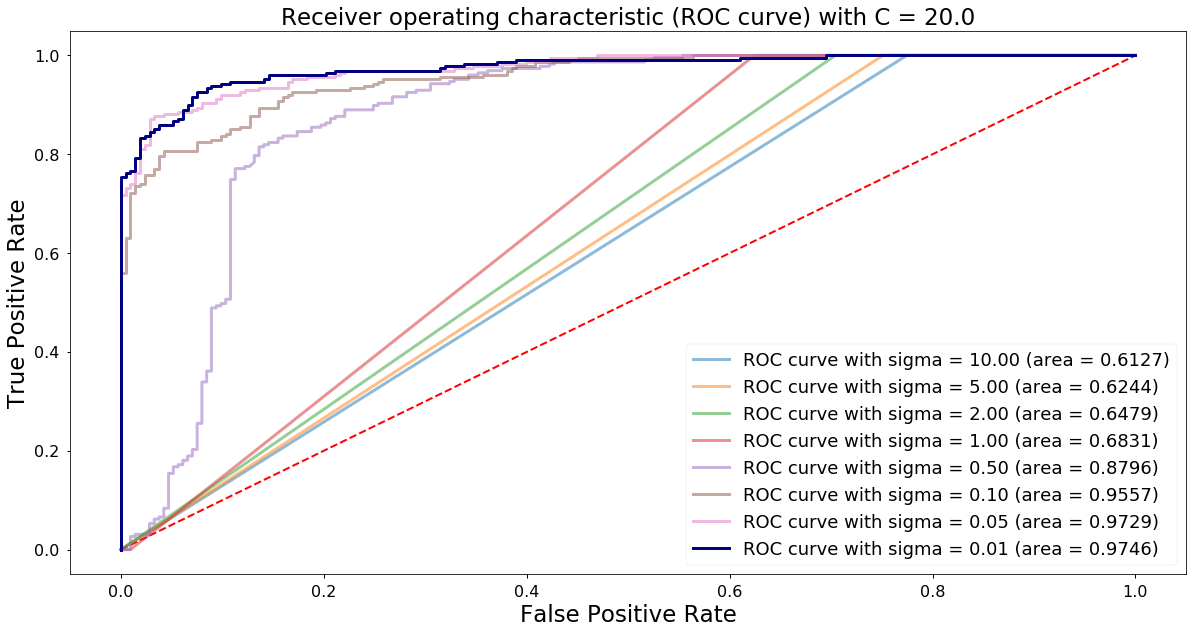

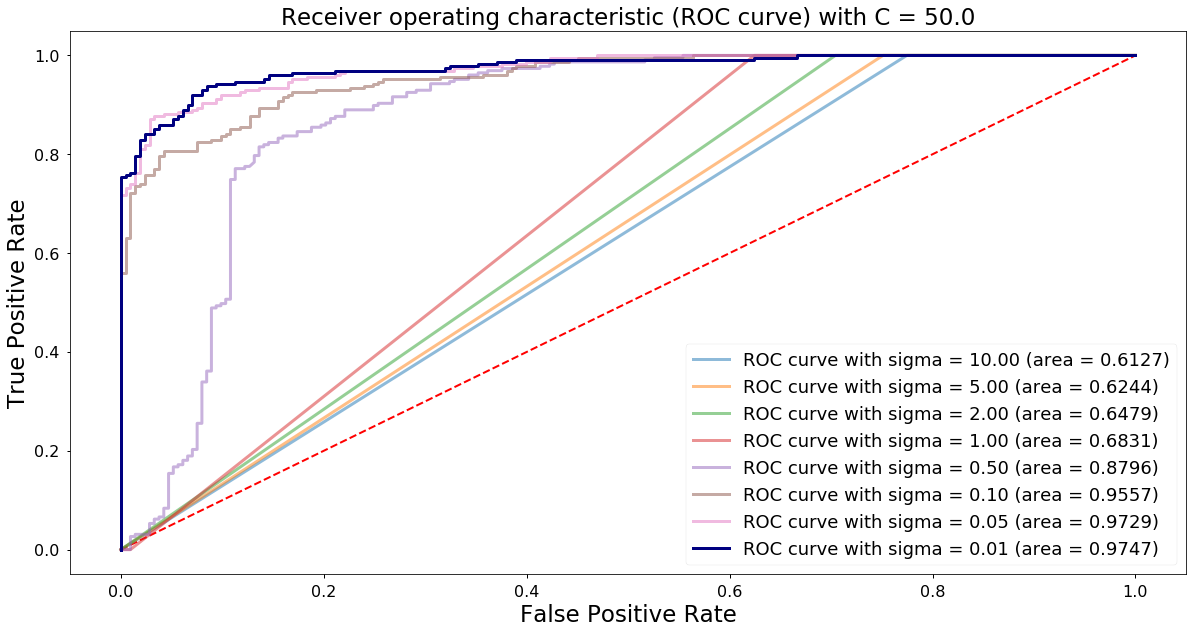

In [9]:
C_ = [0.1, 0.5, 1, 2, 5, 10, 20, 50]
# G = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]
# G = [ 0.05, 0.1, 0.5, 1, 2]
G = [10, 5, 2, 1, 0.5, 0.1, 0.05]
train_results = []
test_results = []


for c in C_:
    lw = 3
    plt.figure(figsize=(20,10))
    plt.plot([0, 1], [0, 1], color='r', lw=2*lw/3, linestyle='--')
    
    for item in G:
        clf_SVC= SVC(gamma = item, C=c, random_state=1)
        clf_SVC.fit(X_train, y_train)
        
        y_score = clf_SVC.decision_function(X_test)

        y_pred_SVC = clf_SVC.predict(X_test)

        # print(roc_curve(y_test, y_score))

        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        
        plt.plot(fpr, tpr,
                 lw=lw, alpha= 0.5,
#                  label='ROC curve with C = %0.2f (area = %0.4f)' % (c, roc_auc))
                 label='ROC curve with sigma = %0.2f (area = %0.4f)' % (item, roc_auc))

        # plt.xlim([0.0, 1.0])
        # plt.ylim([0.0, 1.05])
        
        train_pred = clf_SVC.predict(X_train)
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        train_results.append(roc_auc)
        
        y_pred = clf_SVC.predict(X_test)
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_results.append(roc_auc)
        
    clf_SVC= SVC(gamma = 0.01, C=c, random_state=1)
    clf_SVC.fit(X_train, y_train)

    y_score = clf_SVC.decision_function(X_test)
    y_pred_SVC = clf_SVC.predict(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='navy',
             lw=lw, label='ROC curve with sigma = 0.01 (area = %0.4f)' %roc_auc)


    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic (ROC curve) with Gamma = %0.2f' %item)


    plt.title('Receiver operating characteristic (ROC curve) with C = %0.1f' %c)
    plt.legend(loc="best")
    plt.show()
#     print("G")
#     print(G)
#     print("train_results")
#     print(train_results)
#     line1, = plt.plot(G, train_results, 'b', label="Train AUC", alpha = 0.5)
#     line2, = plt.plot(G, test_results, 'r', label="Test AUC", alpha = 0.5)
#     train_results = []
#     test_results = []
#     plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

#     plt.savefig(os.path.join('2-3-b-rf(n_estimator).png'), dpi=300, format='png', bbox_inches='tight')
# plt.legend(loc='best')
# plt.ylabel('AUC score')
# plt.xlabel('Gamma')
# plt.title('AUC plot for RF')    
# plt.show()

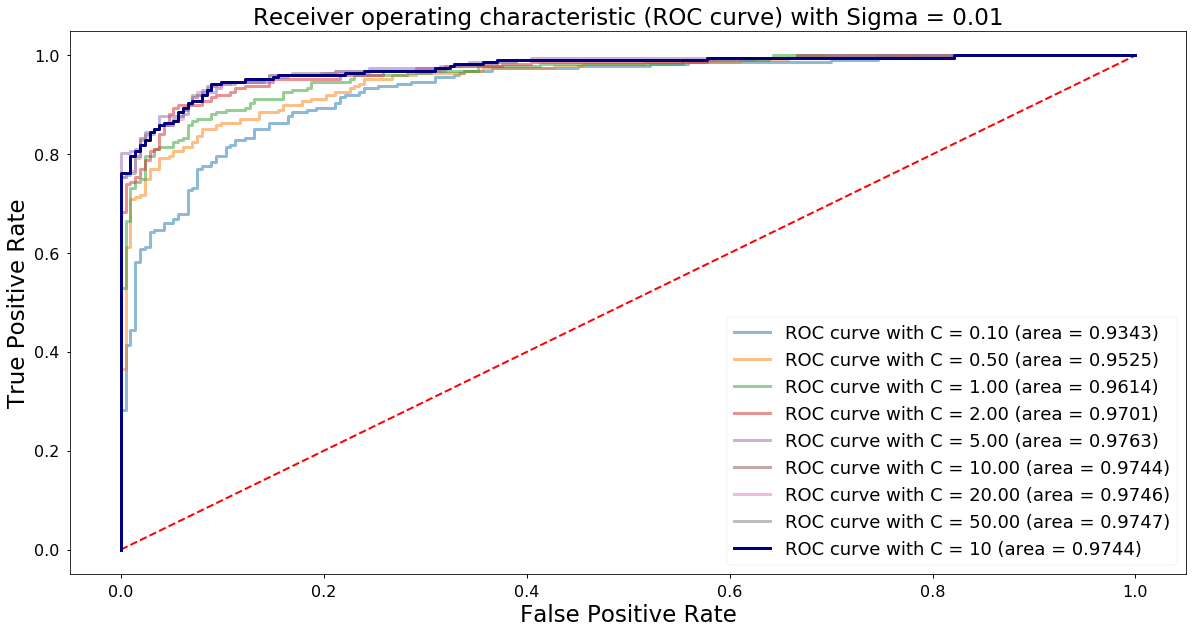

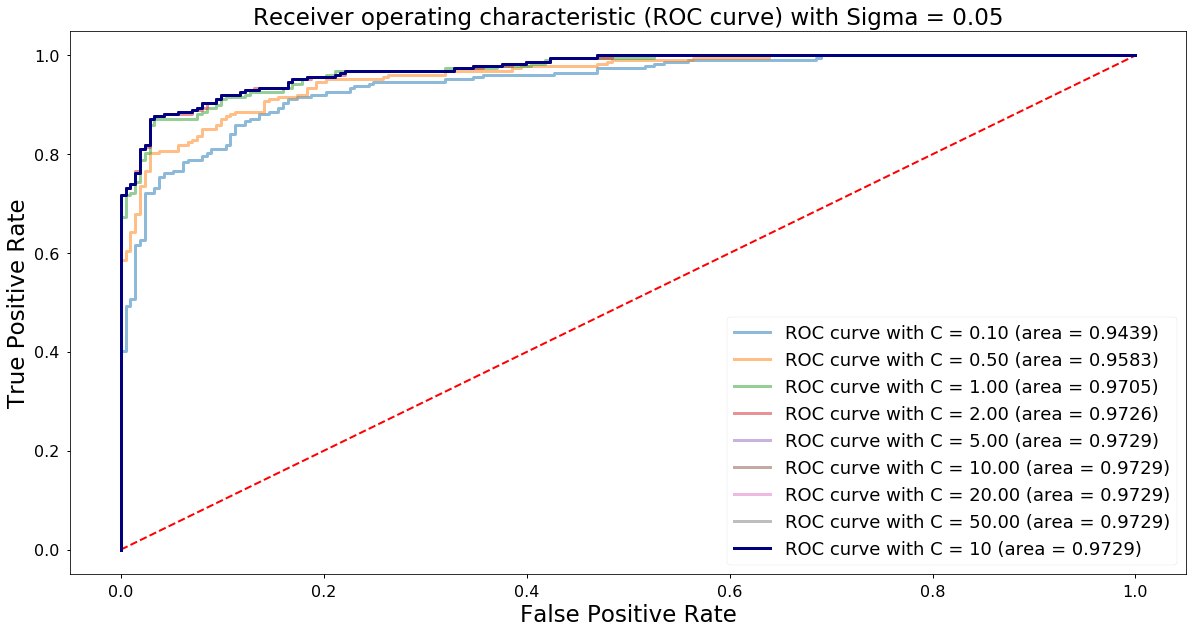

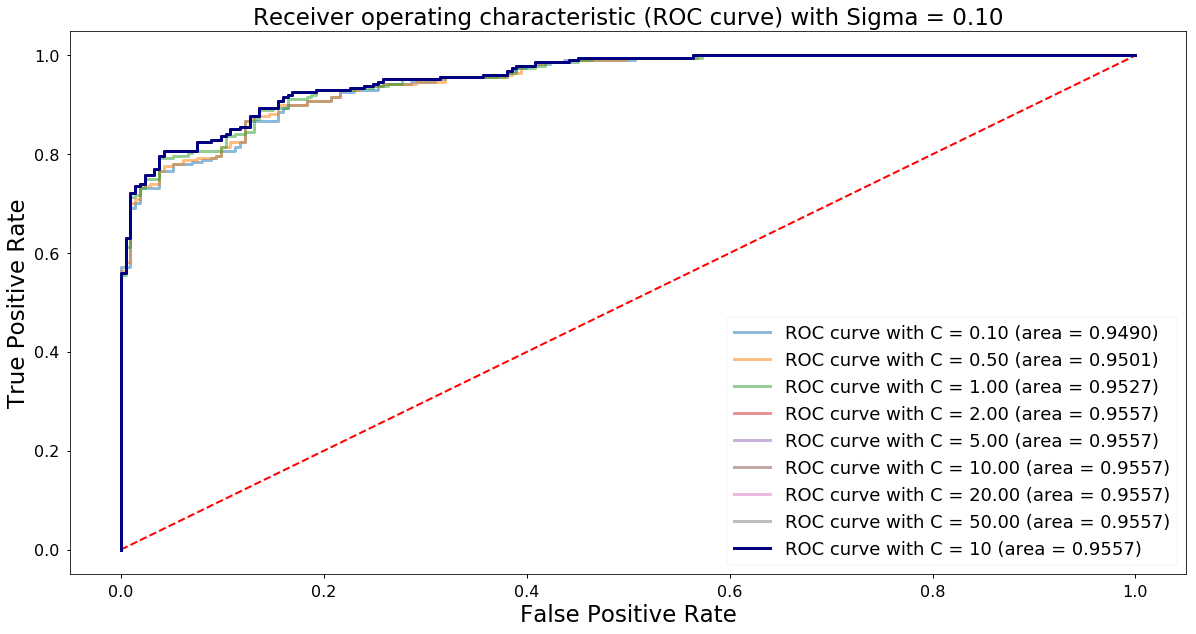

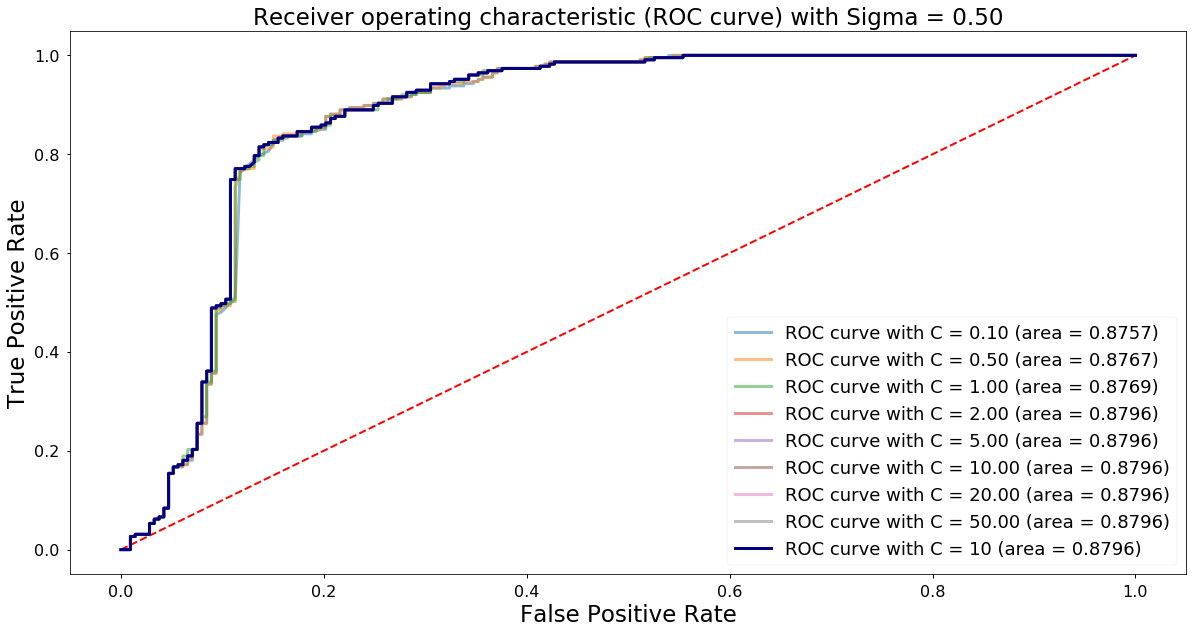

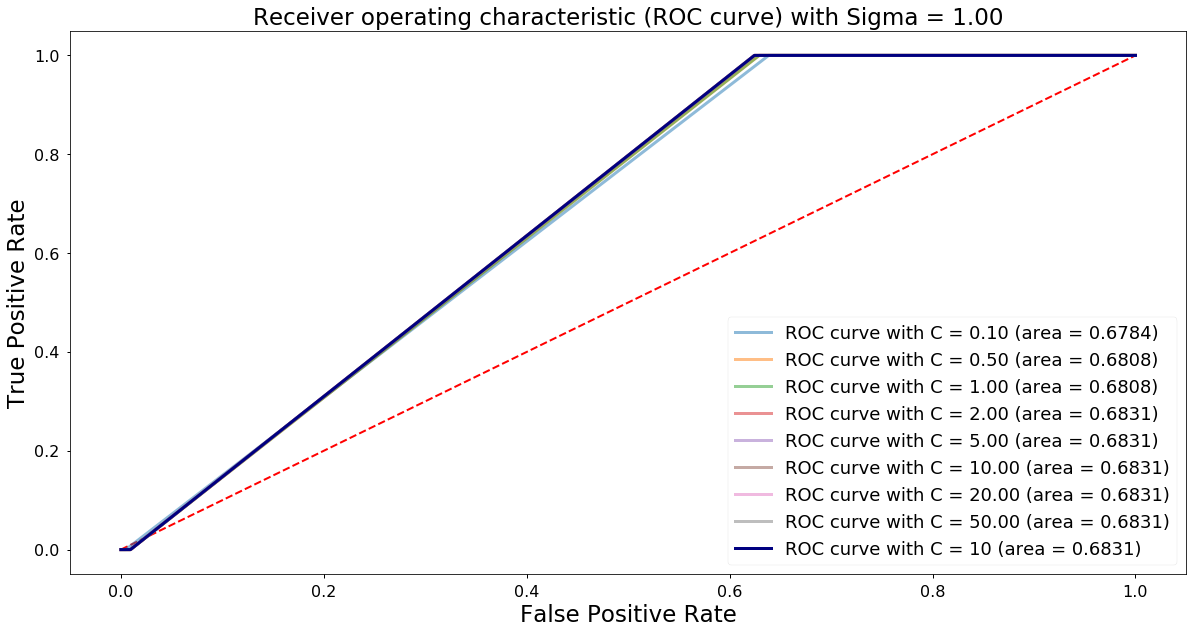

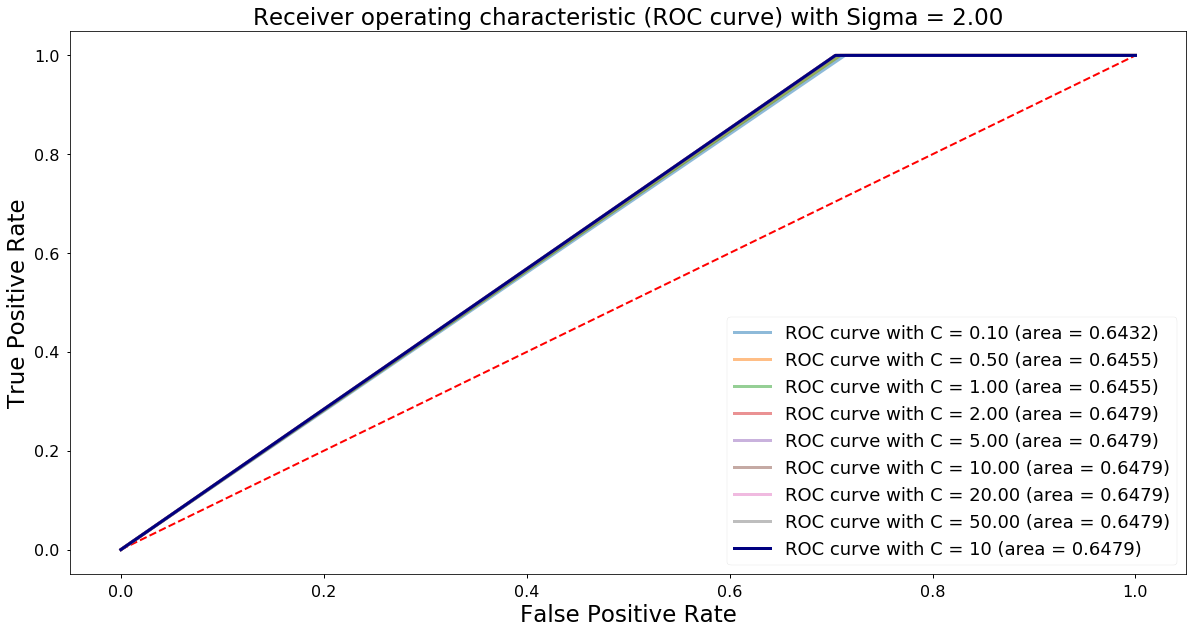

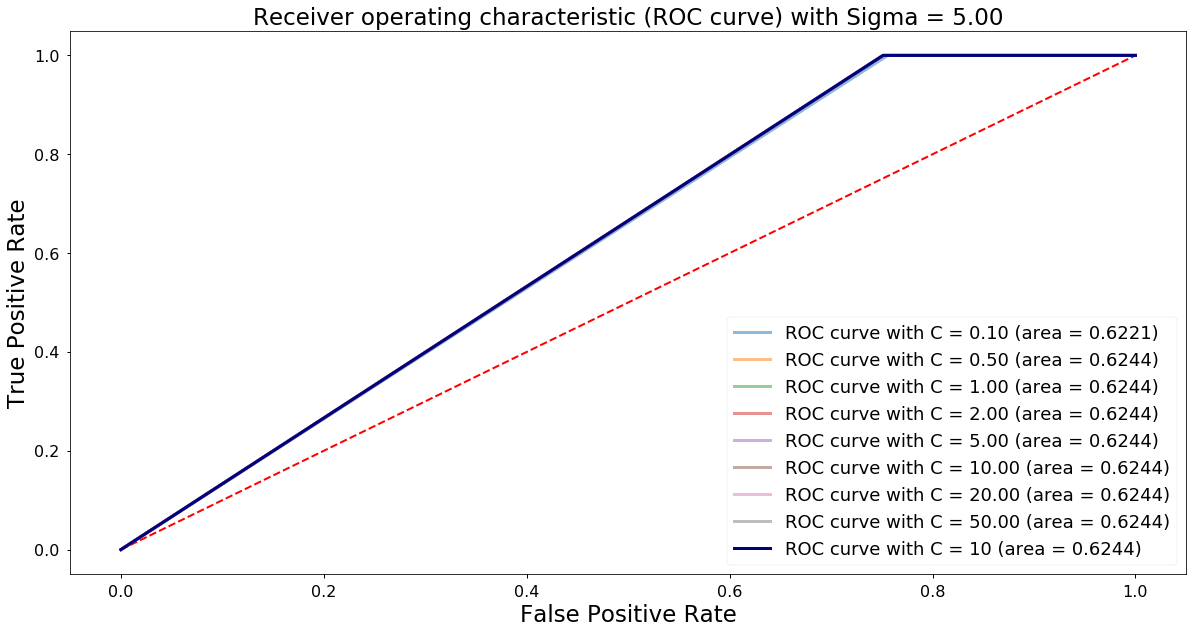

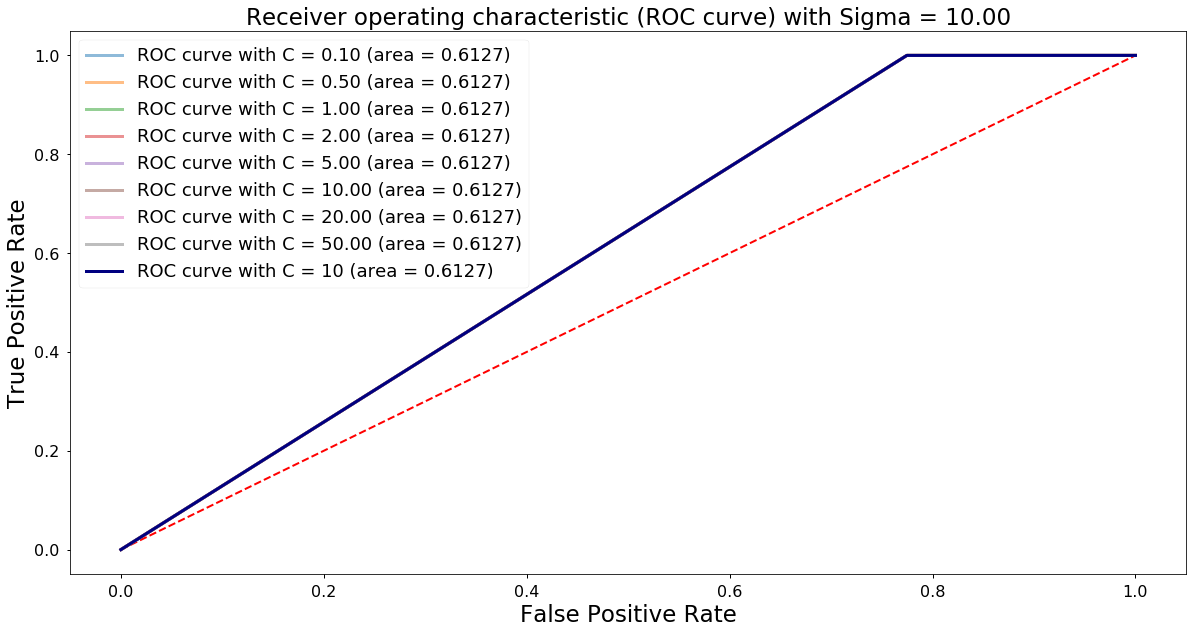

In [10]:
G = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]
C_ = [0.1, 0.5, 1, 2, 5, 10, 20, 50]

for item in G:
    lw = 3
    plt.figure(figsize=(20,10))
    plt.plot([0, 1], [0, 1], color='r', lw=2*lw/3, linestyle='--')
    
    for c in C_:    
        clf_SVC= SVC(gamma = item, C=c, random_state=1)
        clf_SVC.fit(X_train, y_train)
        
        y_score = clf_SVC.decision_function(X_test)

        y_pred_SVC = clf_SVC.predict(X_test)

        # print(roc_curve(y_test, y_score))

        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        
        plt.plot(fpr, tpr,
                 lw=lw, alpha = 0.5,
                 label='ROC curve with C = %0.2f (area = %0.4f)' % (c, roc_auc))
#                  label='ROC curve with gamma = %0.2f (area = %0.4f)' % (item, roc_auc))

        # plt.xlim([0.0, 1.0])
        # plt.ylim([0.0, 1.05])
        
        train_pred = clf_SVC.predict(X_train)
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        train_results.append(roc_auc)
        
        y_pred = clf_SVC.predict(X_test)
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_results.append(roc_auc)
    
    clf_SVC= SVC(gamma = item, C=10, random_state=1)
    clf_SVC.fit(X_train, y_train)

    y_score = clf_SVC.decision_function(X_test)
    y_pred_SVC = clf_SVC.predict(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='navy',
             lw=lw, label='ROC curve with C = 10 (area = %0.4f)' % roc_auc)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC curve) with Sigma = %0.2f' %item)
    
#     plt.title('Receiver operating characteristic (ROC curve) with C = %0.1f' %c)
    plt.legend(loc="best")
    plt.show()
#     print("G")
#     print(G)
#     print("train_results")
#     print(train_results)
#     line1, = plt.plot(G, train_results, 'b', label="Train AUC", alpha = 0.5)
#     line2, = plt.plot(G, test_results, 'r', label="Test AUC", alpha = 0.5)
#     train_results = []
#     test_results = []
#     plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

#     plt.savefig(os.path.join('2-3-b-rf(n_estimator).png'), dpi=300, format='png', bbox_inches='tight')
# plt.legend(loc='best')
# plt.ylabel('AUC score')
# plt.xlabel('Gamma')
# plt.title('AUC plot for RF')    
# plt.show()

In [11]:
param_grid_SVC = {
    'C': [0.1, 0.5, 1, 2, 5, 10, 20, 50],
    'gamma': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
}


# mapping = {'yes':1, 'no': 0}
# y_temp = pd.Series(y_train)
# y_temp = y_temp.map(mapping)

gs_SVC = GridSearchCV(SVC(random_state=1), param_grid_SVC, cv = 5,
                  scoring = 'balanced_accuracy', n_jobs = -2)
gs_SVC = gs_SVC.fit(X_train, y_train)


print("The best parameters are %s with a score of %0.2f"
      % (gs_SVC.best_params_, gs_SVC.best_score_))

The best parameters are {'C': 10, 'gamma': 0.01} with a score of 0.89


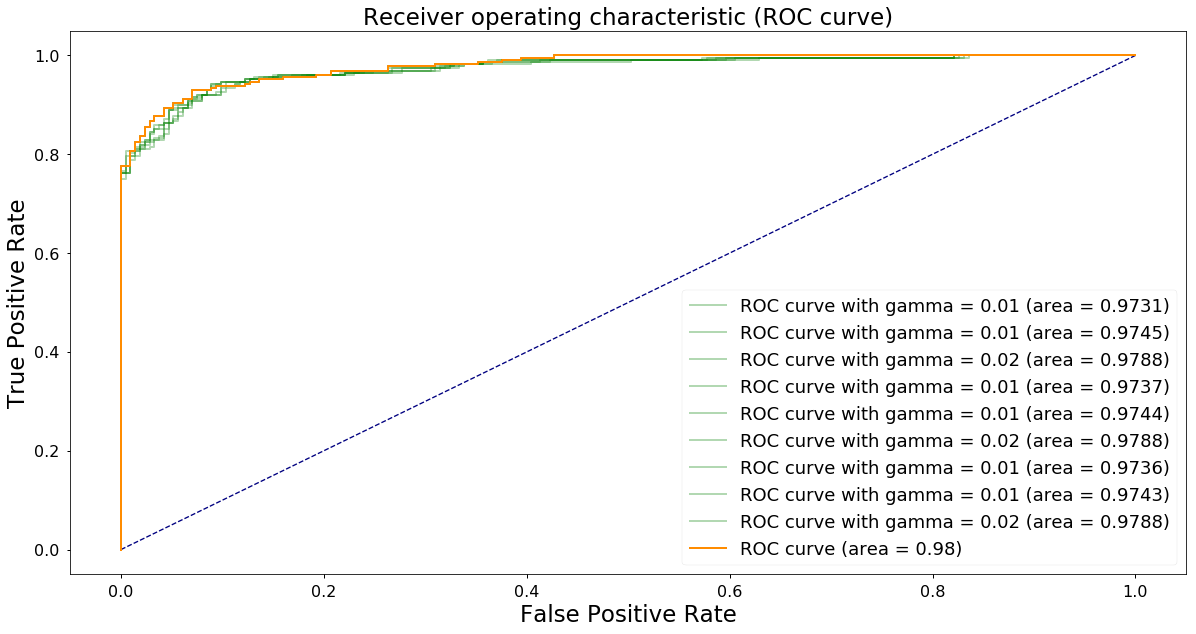

In [12]:
y_score = gs_SVC.decision_function(X_test)

clf_SVC = gs_SVC.best_estimator_
y_pred_SVC = clf_SVC.predict(X_test)

# print(roc_curve(y_test, y_score))
plt.figure(figsize=(20,10))
# plt.figure(figsize=(8,4))

lw = 2

plt.plot([0, 1], [0, 1], color='navy', lw=2*lw/3, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

best_para = gs_SVC.best_params_
best_c = best_para['C']
best_gamma = best_para['gamma']

C_10 = [best_c-best_c/10, best_c, best_c+best_c/10]
G_10 =[best_gamma-best_gamma/2, best_gamma, best_gamma+best_gamma]

for c in C_10:
    for item in G_10:
        clf_SVC_temp= SVC(gamma = item, C=c, random_state=1)
        clf_SVC_temp.fit(X_train, y_train)
        
        y_score = clf_SVC_temp.decision_function(X_test)

        y_pred_SVC = clf_SVC_temp.predict(X_test)

        # print(roc_curve(y_test, y_score))

        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        lw = 2
        plt.plot(fpr, tpr,
                 lw=lw, alpha=0.3, color ="g",
                 label='ROC curve with gamma = %0.2f (area = %0.4f)' % (item, roc_auc))
        # plt.xlim([0.0, 1.0])
        # plt.ylim([0.0, 1.05])
        
        train_pred = clf_SVC.predict(X_train)
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        train_results.append(roc_auc)
        
        y_pred = clf_SVC.predict(X_test)
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_results.append(roc_auc)
        
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
        
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.title('Receiver operating characteristic (ROC curve)')
plt.legend(loc="lower right")
plt.show()

In [13]:
C_10 = [best_c-best_c/10, best_c, best_c+best_c/10]
G_10 =[best_gamma-best_gamma/10, best_gamma, best_gamma+best_gamma/10]

for c in C_10:
    for item in G_10:
        print(c,item)

9.0 0.009000000000000001
9.0 0.01
9.0 0.011
10 0.009000000000000001
10 0.01
10 0.011
11.0 0.009000000000000001
11.0 0.01
11.0 0.011


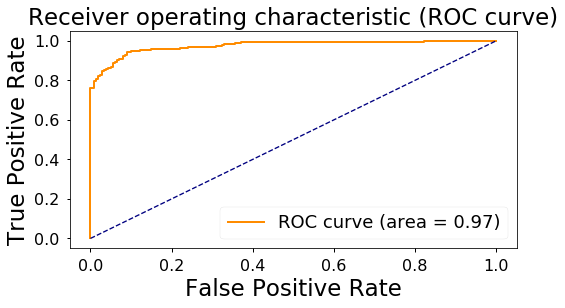

In [14]:
# Original one plot
y_score = gs_SVC.decision_function(X_test)

clf_SVC = gs_SVC.best_estimator_
y_pred_SVC = clf_SVC.predict(X_test)

# print(roc_curve(y_test, y_score))



plt.figure(figsize=(8,4))

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)



lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2*lw/3, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC curve)')
plt.legend(loc="lower right")
plt.show()

In [15]:
# # C_ = [0.1, 0.5, 1, 2, 5, 10, 20, 50]
# C_=[0.1,0.5]
# # G = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]
# G = [0.01, 0.05, 0.1, 0.5, 1, 2]
# train_results = []
# test_results = []


# plt.figure(figsize=(10,10))
# for c in C_:
#     for item in G:
#         clf_SVC= SVC(gamma = item, C=c, random_state=1)
#         clf_SVC.fit(X_train, y_train)
        
#         train_pred = clf_SVC.predict(X_train)
        
#         false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#         roc_auc = auc(false_positive_rate, true_positive_rate)
#         train_results.append(roc_auc)
        
#         y_pred = clf_SVC.predict(X_test)
        
#         false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#         roc_auc = auc(false_positive_rate, true_positive_rate)
#         test_results.append(roc_auc)
#     print("G")
#     print(G)
#     print("train_results")
#     print(train_results)
#     line1, = plt.plot(G, train_results, 'b', label="Train AUC", alpha = 0.5)
#     line2, = plt.plot(G, test_results, 'r', label="Test AUC", alpha = 0.5)
#     train_results = []
#     test_results = []
# #     plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

# #     plt.savefig(os.path.join('2-3-b-rf(n_estimator).png'), dpi=300, format='png', bbox_inches='tight')
# plt.legend(loc='best')
# plt.ylabel('AUC score')
# plt.xlabel('Gamma')
# plt.title('AUC plot for RF')    
# plt.show()

## 3. Train (at least) six classifiers and report the results:
### (a) Classify the test set using k-NN, SVM, Random Forests and Neural Networks. Use the chosen parameters from the parameter selection process in question 2 for k-NN and SVM. For the next two classifiers use the default setups listed at the end for Random Forests and Neural Networks [15].


In [16]:
# k-NN
clf_knn = KNeighborsClassifier(n_neighbors = n_n)
# n_neighbors = n_n

clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)

df_knn=pd.concat((pd.DataFrame(X_test), pd.DataFrame(y_pred_knn, columns=['y'])), axis=1)

err = (y_test != y_pred_knn).sum()/len(y_test)
acc = 1-err
print("The accuracy of the kNN model is " + str(round(acc,3)) + 
      " and the error is " + str(round(err,3)) + "\n" + "  'no'  'yes'")

#Evaluating
print(metrics.confusion_matrix(y_test, y_pred_knn))
print(metrics.classification_report(y_test, y_pred_knn))

The accuracy of the kNN model is 0.789 and the error is 0.211
  'no'  'yes'
[[206   7]
 [ 86 141]]
              precision    recall  f1-score   support

          -1       0.71      0.97      0.82       213
           1       0.95      0.62      0.75       227

   micro avg       0.79      0.79      0.79       440
   macro avg       0.83      0.79      0.78       440
weighted avg       0.83      0.79      0.78       440



In [17]:
# SVM
clf_SVC = gs_SVC.best_estimator_
clf_SVC.fit(X_train, y_train)

y_pred_SVC = clf_SVC.predict(X_test)

df_SVC=pd.concat((pd.DataFrame(X_test), pd.DataFrame(y_pred_SVC, columns=['y'])), axis=1)

err = (y_test != y_pred_SVC).sum()/len(y_test)
acc = 1-err
print("The accuracy of the SVC classifier is " + str(round(acc,3)) + 
      " and the error is " + str(round(err,3)) + "\n" + "  '-1'  '1'")

#Evaluating
print(metrics.confusion_matrix(y_test, y_pred_SVC))
print(metrics.classification_report(y_test, y_pred_SVC))

The accuracy of the SVC classifier is 0.918 and the error is 0.082
  '-1'  '1'
[[196  17]
 [ 19 208]]
              precision    recall  f1-score   support

          -1       0.91      0.92      0.92       213
           1       0.92      0.92      0.92       227

   micro avg       0.92      0.92      0.92       440
   macro avg       0.92      0.92      0.92       440
weighted avg       0.92      0.92      0.92       440



In [18]:
# Random Forest
clf_forest = RandomForestClassifier(random_state=1)
clf_forest = clf_forest.fit(X_train, y_train)

y_pred_forest = clf_forest.predict(X_test)

err = (y_test != y_pred_forest).sum()/len(y_test)
acc = 1-err
print("The accuracy of the Random Forest classifier is " + str(round(acc,3)) + 
      " and the error is " + str(round(err,3)) + "\n" + "  '-1'  '1'")

print(metrics.confusion_matrix(y_test, y_pred_forest))
print(metrics.classification_report(y_test, y_pred_forest))

The accuracy of the Random Forest classifier is 0.943 and the error is 0.057
  '-1'  '1'
[[210   3]
 [ 22 205]]
              precision    recall  f1-score   support

          -1       0.91      0.99      0.94       213
           1       0.99      0.90      0.94       227

   micro avg       0.94      0.94      0.94       440
   macro avg       0.95      0.94      0.94       440
weighted avg       0.95      0.94      0.94       440



In [19]:
# Neural Network
clf_nn = MLPClassifier(random_state=1)
clf_nn = clf_nn.fit(X_train, y_train)

y_pred_nn = clf_nn.predict(X_test)


err = (y_test != y_pred_nn).sum()/len(y_test)
acc = 1-err
print("The accuracy of the Neural Network classifier is " + str(round(acc,3)) + 
      " and the error is " + str(round(err,3)) + "\n" + "  '-1'  '1'")

print(metrics.confusion_matrix(y_test, y_pred_nn))
print(metrics.classification_report(y_test, y_pred_nn))

The accuracy of the Neural Network classifier is 0.925 and the error is 0.075
  '-1'  '1'
[[200  13]
 [ 20 207]]
              precision    recall  f1-score   support

          -1       0.91      0.94      0.92       213
           1       0.94      0.91      0.93       227

   micro avg       0.93      0.93      0.93       440
   macro avg       0.93      0.93      0.92       440
weighted avg       0.93      0.93      0.93       440



### (b) For the fifth and sixth classifiers, you should explore the parameters of the Random Forests and Neural Network models to devise your own classifier instance that does better than the other methods. For example, you could consider a deeper neural network with multiple layers, use different optimization/solver algorithms, you could modify the Random Forests using different parameter settings for depth and number of trees or enable boosting. Play around with options and choose a setting for RFs and NNs that performs better.

In [20]:
# Random Forest tuned
param_grid = {
    "n_estimators":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
    'max_depth': list(range(2,40,1)),
    'criterion': ["gini", "entropy"],
}


gs_rf = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv = 5,
                  scoring = 'balanced_accuracy', n_jobs = -2)
gs_rf = gs_rf.fit(X_train, y_train)

print("The best parameters for the random forest are %s with a score of %0.2f" 
      % (gs_rf.best_params_, gs_rf.best_score_))


The best parameters for the random forest are {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 130} with a score of 0.97


In [21]:
# Random Forest tuned
param_grid = {
    "n_estimators": list(range(120,140)),
    'max_depth': list(range(2,40,1)),
    'criterion': ["gini", "entropy"],
}


gs_rf = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv = 5,
                  scoring = 'balanced_accuracy', n_jobs = -2)
gs_rf = gs_rf.fit(X_train, y_train)

clf_5 = gs_rf.best_estimator_


print("The best parameters for the random forest are %s with a score of %0.2f" 
      % (gs_rf.best_params_, gs_rf.best_score_))

The best parameters for the random forest are {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 136} with a score of 0.97


In [22]:
#Tuned random forest
y_pred_5 = clf_5.predict(X_test)


err = (y_test != y_pred_5).sum()/len(y_test)
acc = 1-err
print("The accuracy of the tuned random forest classifier is " + str(round(acc,3)) + 
      " and the error is " + str(round(err,3)) + "\n" + "  '-1'  '1'")

print(metrics.confusion_matrix(y_test, y_pred_5))
print(metrics.classification_report(y_test, y_pred_5))

The accuracy of the tuned random forest classifier is 0.964 and the error is 0.036
  '-1'  '1'
[[209   4]
 [ 12 215]]
              precision    recall  f1-score   support

          -1       0.95      0.98      0.96       213
           1       0.98      0.95      0.96       227

   micro avg       0.96      0.96      0.96       440
   macro avg       0.96      0.96      0.96       440
weighted avg       0.96      0.96      0.96       440



In [23]:
# Neural Network tuned
print("The hidden layer size should be:")
print("Between the input layer size " + str(X_train.shape[1]) 
      + " and the output layer size " + str(len(set(y_test))))
print("Around " + str(2/3*(X_train.shape[1]+len(set(y_test)))))
print("less than " + str(2*X_train.shape[1]))

The hidden layer size should be:
Between the input layer size 57 and the output layer size 2
Around 39.33333333333333
less than 114


In [24]:
param_grid = {
    'hidden_layer_sizes': [(x*10)for x in range(1,12)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['adam','lbfgs', 'sgd']
}


gs_nn = GridSearchCV(MLPClassifier(random_state=1), param_grid, cv = 5,
                  scoring = 'balanced_accuracy', n_jobs = -2)
gs_nn = gs_nn.fit(X_train, y_train)



print("The best parameters are %s with a score of %0.2f" 
      % (gs_nn.best_params_, gs_nn.best_score_))

The best parameters are {'activation': 'relu', 'hidden_layer_sizes': 50, 'solver': 'lbfgs'} with a score of 0.91


In [25]:
param_grid2 = {
    'hidden_layer_sizes': list(range(40,60)),
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['adam','lbfgs', 'sgd']
}


gs_nn = GridSearchCV(MLPClassifier(random_state=1), param_grid2, cv = 5,
                  scoring = 'balanced_accuracy', n_jobs = -2)
gs_nn = gs_nn.fit(X_train, y_train)

clf_6 = gs_nn.best_estimator_


print("The best parameters are %s with a score of %0.2f" 
      % (gs_nn.best_params_, gs_nn.best_score_))

The best parameters are {'activation': 'relu', 'hidden_layer_sizes': 50, 'solver': 'lbfgs'} with a score of 0.91


In [26]:
# Tuned Neural Network
y_pred_6 = clf_6.predict(X_test)


err = (y_test != y_pred_6).sum()/len(y_test)
acc = 1-err
print("The accuracy of the tuned Neural Network classifier is " + str(round(acc,3)) + 
      " and the error is " + str(round(err,3)) + "\n" + "  '-1'  '1'")

print(metrics.confusion_matrix(y_test, y_pred_6))
print(metrics.classification_report(y_test, y_pred_6))

The accuracy of the tuned Neural Network classifier is 0.932 and the error is 0.068
  '-1'  '1'
[[200  13]
 [ 17 210]]
              precision    recall  f1-score   support

          -1       0.92      0.94      0.93       213
           1       0.94      0.93      0.93       227

   micro avg       0.93      0.93      0.93       440
   macro avg       0.93      0.93      0.93       440
weighted avg       0.93      0.93      0.93       440



## (c) Repeat each classification method 20 times by varying the split of the training-test set as in question 2-2. Report the average and standard deviation of classification performance on the test set regarding: accuracy, precision, recall, and F- Measure. Also report the training time and classification time of all the methods. Explain why the classification was repeated 20 times [5].

In [27]:
# clf_knn
# clf_SVC
# clf_forest
# clf_nn
# clf_5
# clf_6
scoring_metrics = ('balanced_accuracy', 'precision', 'recall', 'f1')
col = ['test_balanced_accuracy', 'test_precision', 'test_recall',
       'test_f1', 'fit_time', 'score_time']

results_knn = pd.DataFrame([], columns = col)
results_SVC = pd.DataFrame([], columns = col)
results_forest = pd.DataFrame([], columns = col)
results_nn = pd.DataFrame([], columns = col)
results_5 = pd.DataFrame([], columns = col)
results_6 = pd.DataFrame([], columns = col)

temp_knn = pd.DataFrame([], columns = col)
temp_SVC = pd.DataFrame([], columns = col)
temp_forest = pd.DataFrame([], columns = col)
temp_nn = pd.DataFrame([], columns = col)
temp_5 = pd.DataFrame([], columns = col)
temp_6 = pd.DataFrame([], columns = col)

for i in range(4,8,1):
    scores_knn = []
    scores_SVC = []
    scores_forest = []
    scores_nn = []
    scores_5 = []
    scores_6 = []
    cross_val_iter = 20
    for j in range(cross_val_iter):
        scores_knn.append(cross_validate(clf_knn, X, y, cv=i, scoring = scoring_metrics, n_jobs = -2 ))
        scores_SVC.append(cross_validate(clf_SVC, X, y, cv=i, scoring = scoring_metrics, n_jobs = -2 ))
        scores_forest.append(cross_validate(clf_forest, X, y, cv=i, scoring = scoring_metrics, n_jobs = -2 ))
        scores_nn.append(cross_validate(clf_nn, X, y, cv=i, scoring = scoring_metrics, n_jobs = -2 ))
        scores_5.append(cross_validate(clf_5, X, y, cv=i, scoring = scoring_metrics, n_jobs = -2 ))
        scores_6.append(cross_validate(clf_6, X, y, cv=i, scoring = scoring_metrics, n_jobs = -2 ))
    
#     scores_dic = {'kNN':scores_knn, 'SVC': scores_SVC, 
#               'Random Forest': scores_forest, "Neural Network": scores_nn, 
#              'Random Forest 2': scores_5, 'Neural Network 2': scores_6}
    
    for s in range(cross_val_iter):
        for c in col:
            temp_knn.loc[s,c] = scores_knn[s][c].mean()
            temp_SVC.loc[s,c] = scores_SVC[s][c].mean()
            temp_forest.loc[s,c] = scores_forest[s][c].mean()
            temp_nn.loc[s,c] = scores_nn[s][c].mean()
            temp_5.loc[s,c] = scores_5[s][c].mean()
            temp_6.loc[s,c] = scores_6[s][c].mean()
    for c in col:
        results_knn.loc[i-4,c] = temp_knn[c].mean()
        results_SVC.loc[i-4,c] = temp_SVC[c].mean()
        results_forest.loc[i-4,c] = temp_forest[c].mean()
        results_nn.loc[i-4,c] = temp_nn[c].mean()
        results_5.loc[i-4,c] = temp_5[c].mean()
        results_6.loc[i-4,c] = temp_6[c].mean()
        
        results_knn.loc[i-4, str(c)+'_std'] = temp_knn[c].std()
        results_SVC.loc[i-4, str(c)+'_std'] = temp_SVC[c].std()
        results_forest.loc[i-4, str(c)+'_std'] = temp_forest[c].std()
        results_nn.loc[i-4, str(c)+'_std'] = temp_nn[c].std()
        results_5.loc[i-4, str(c)+'_std'] = temp_5[c].std()
        results_6.loc[i-4, str(c)+'_std'] = temp_6[c].std()

In [28]:
results_knn

,test_balanced_accuracy,test_precision,test_recall,test_f1,fit_time,score_time,test_balanced_accuracy_std,test_precision_std,test_recall_std,test_f1_std,fit_time_std,score_time_std
0,0.75431,0.940565,0.545302,0.689932,0.00445933,0.289953,1.139065e-16,1.139065e-16,1.139065e-16,1.139065e-16,0.000678,0.017480
1,0.757066,0.947293,0.547063,0.693006,0.00457955,0.236614,1.139065e-16,0.000000e+00,0.000000e+00,1.139065e-16,0.000308,0.004103
2,0.75521,0.943057,0.546176,0.691212,0.00502365,0.223084,1.139065e-16,1.139065e-16,0.000000e+00,1.139065e-16,0.000510,0.009743
3,0.759123,0.942573,0.554944,0.697669,0.00520019,0.224364,1.139065e-16,1.139065e-16,1.139065e-16,1.139065e-16,0.000483,0.012593


In [29]:
import csv
result_dic={'knn':results_knn, 'SVC':results_SVC, 
            'Random Forest':results_forest, 'Neural Network':results_nn,
            'Random Forest 2':results_5, 'Neural Network 2':results_6}

with open('mycsvfile.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f, result_dic.keys())
#     w.writeheader()
    w.writerow(result_dic)

In [30]:
print(scores_knn[0])
print("\n")
scores_SVC

{'fit_time': array([0.00498772, 0.00399971, 0.00398922, 0.00598526, 0.00693941,
       0.00498533, 0.00398898]), 'score_time': array([0.18650198, 0.20643902, 0.19248629, 0.23836184, 0.25332403,
       0.18849707, 0.1884985 ]), 'test_balanced_accuracy': array([0.74735631, 0.73944543, 0.79732402, 0.7744883 , 0.71791748,
       0.78273229, 0.75459897]), 'train_balanced_accuracy': array([0.81280302, 0.80774055, 0.8083249 , 0.79403473, 0.81561766,
       0.7839669 , 0.80705466]), 'test_precision': array([0.94505495, 0.87619048, 0.98989899, 0.98901099, 0.92771084,
       0.94230769, 0.92783505]), 'train_precision': array([0.96358118, 0.96589147, 0.96884735, 0.9847973 , 0.9667171 ,
       0.96954315, 0.97169811]), 'test_recall': array([0.52760736, 0.56441718, 0.60122699, 0.55555556, 0.47530864,
       0.60493827, 0.55555556]), 'train_recall': array([0.65195072, 0.63963039, 0.6386037 , 0.59794872, 0.65538462,
       0.58769231, 0.63384615]), 'test_f1': array([0.67716535, 0.68656716, 0.7480916 

[{'fit_time': array([0.1744988 , 0.17453384, 0.25627899, 0.23234177, 0.17852211,
         0.25431871, 0.23038006]),
  'score_time': array([0.08078623, 0.0827806 , 0.08776712, 0.10871124, 0.08278012,
         0.09075975, 0.10871124]),
  'test_balanced_accuracy': array([0.86979335, 0.88908621, 0.90597756, 0.89981319, 0.90208739,
         0.92986517, 0.91638051]),
  'train_balanced_accuracy': array([1., 1., 1., 1., 1., 1., 1.]),
  'test_precision': array([0.87654321, 0.9       , 0.94039735, 0.95138889, 0.92810458,
         0.93209877, 0.90963855]),
  'train_precision': array([1., 1., 1., 1., 1., 1., 1.]),
  'test_recall': array([0.87116564, 0.88343558, 0.87116564, 0.84567901, 0.87654321,
         0.93209877, 0.93209877]),
  'train_recall': array([1., 1., 1., 1., 1., 1., 1.]),
  'test_f1': array([0.87384615, 0.89164087, 0.9044586 , 0.89542484, 0.9015873 ,
         0.93209877, 0.92073171]),
  'train_f1': array([1., 1., 1., 1., 1., 1., 1.])},
 {'fit_time': array([0.16755319, 0.21043777, 0.28

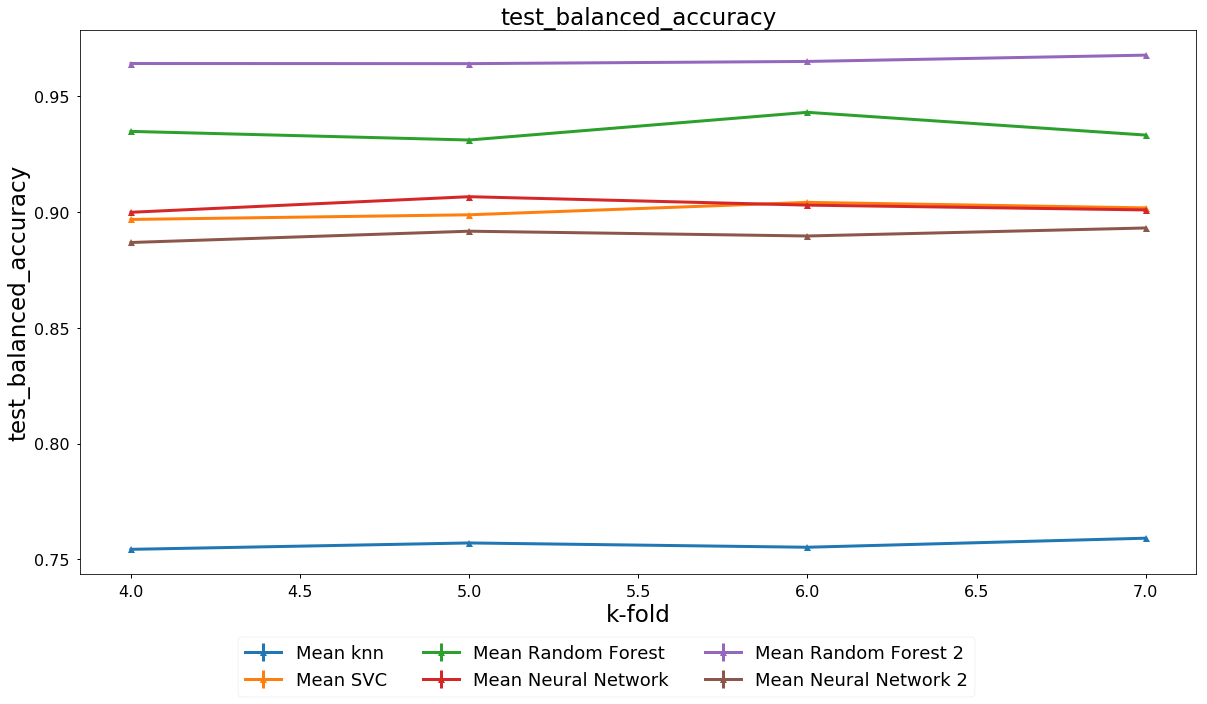

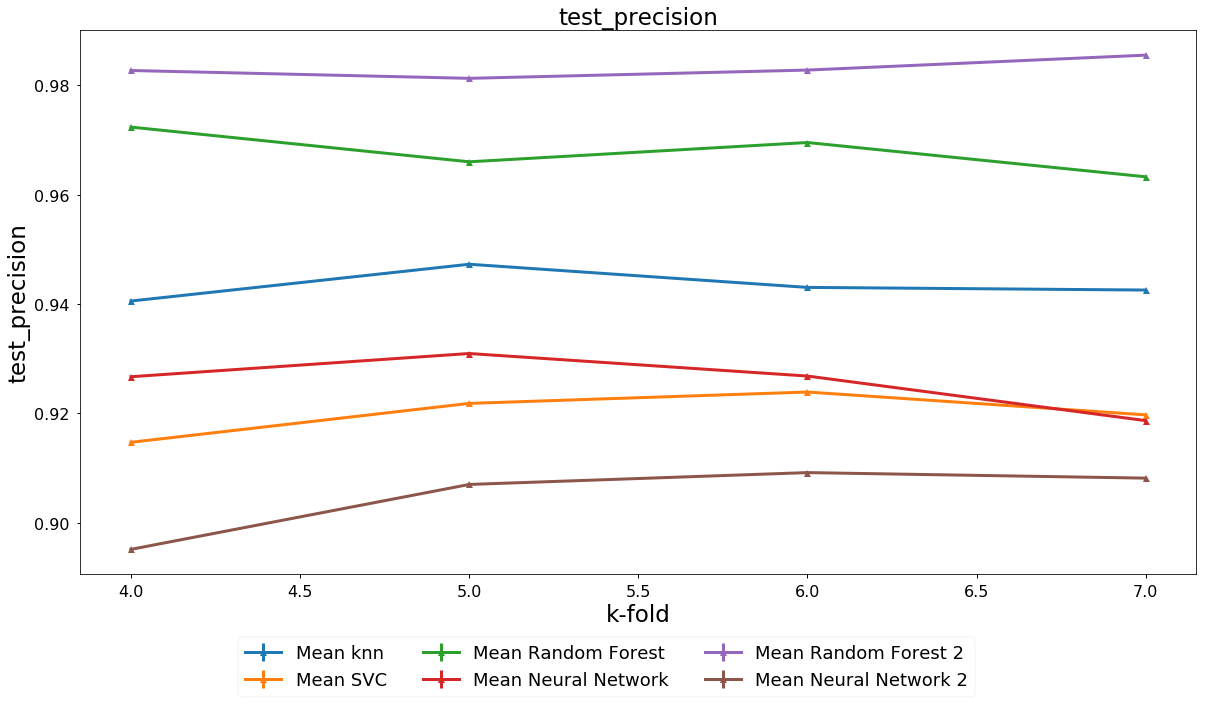

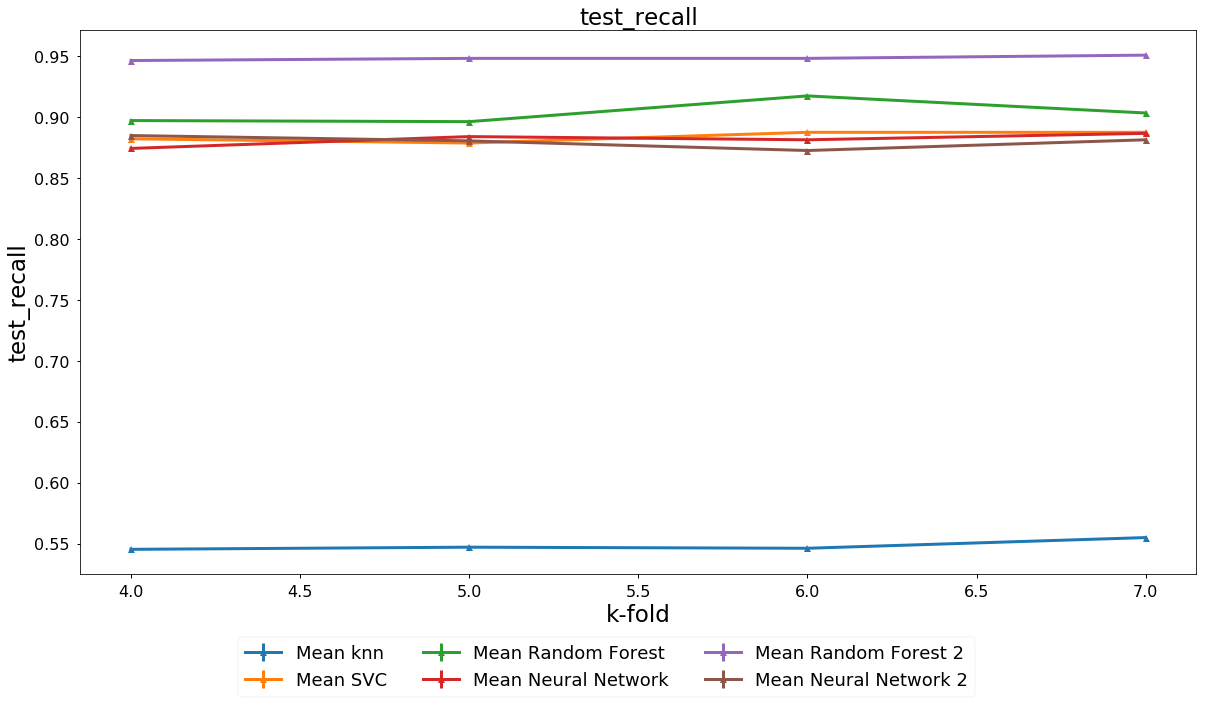

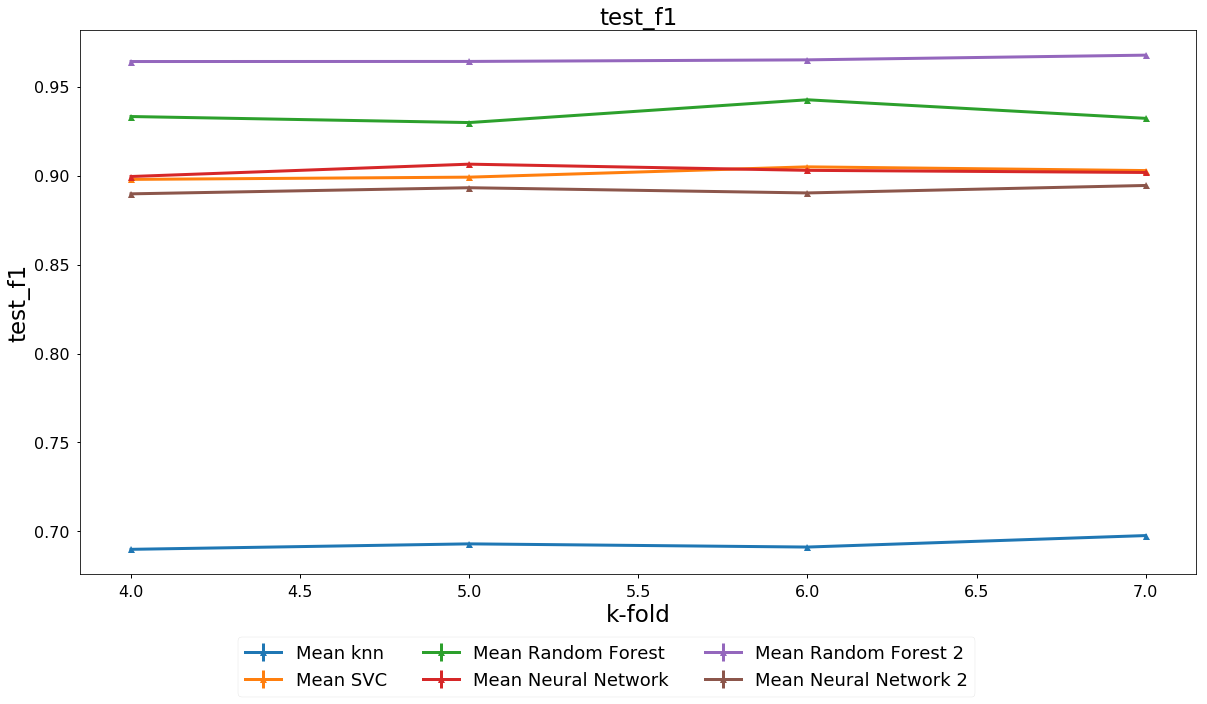

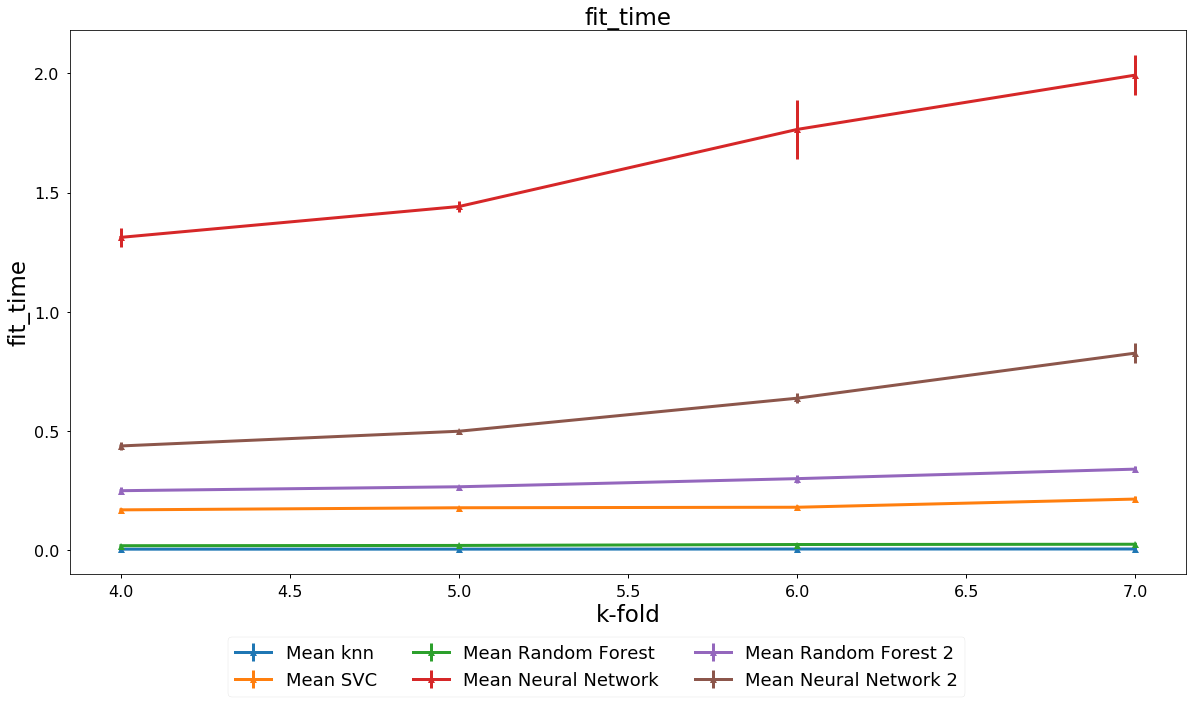

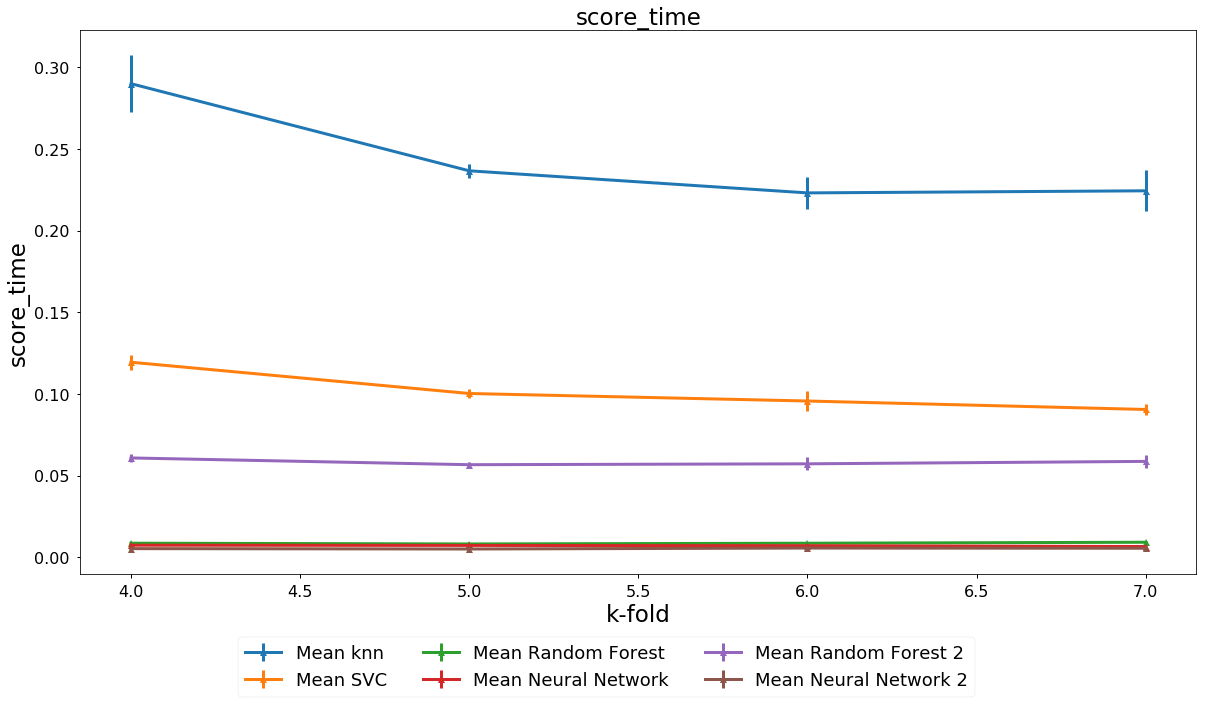

In [31]:


scores_dic = {'kNN':scores_knn, 'SVC': scores_SVC, 
              'Random Forest': scores_forest, "Neural Network": scores_nn, 
             'Random Forest 2': scores_5, 'Neural Network 2': scores_6}

result_dic={'knn':results_knn, 'SVC':results_SVC, 
            'Random Forest':results_forest, 'Neural Network':results_nn,
            'Random Forest 2':results_5, 'Neural Network 2':results_6}

lw=3
def report(measure):
    plt.figure(figsize=(20,10))
    for key, result in result_dic.items():

#         plt.plot([4,5,6,7],measure_mean, label = "Mean "+ str(key), lw=lw)
        plt.errorbar([4,5,6,7],result[measure], result[measure + "_std"], 
                     marker='^', 
                     label = "Mean "+ str(key), 
                     lw=lw )
    #     plt.plot([4,5,6,7],[measure_mean[i]-measure_std[i] for i in range(4)])
    #     plt.plot([4,5,6,7],[measure_mean[i]+measure_std[i] for i in range(4)])
    plt.ylabel(measure)
    plt.xlabel("k-fold")
#     plt.ylim([min(measure_mean)-2*max(measure_std),max(measure_mean)+2*max(measure_std) ])
    plt.legend(bbox_to_anchor=(0.81, -0.1),ncol = 3)
    plt.title(measure)
    plt.show()
for c in col:
    report(c)


### 5.	If you had to remove 1 feature from the dataset, which feature would you select to remove from the dataset and why? What would have happened if you did classification on two dimensions only?

In [32]:
X.cov()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1.218689,0.129806,0.045067,0.017009,0.038979,0.037467,0.029673,-0.012906,-0.050569,0.025455,...,0.024841,0.023638,-0.024803,-0.038842,-0.003211,0.007610,0.005475,0.006824,0.059048,0.001903
1,0.129806,1.180573,0.119853,0.042409,-0.006868,0.008173,-0.022624,0.025153,-0.035224,0.033095,...,0.037574,0.028690,-0.047896,0.007030,-0.008974,0.003707,0.024177,-0.001832,0.011067,0.031470
2,0.045067,0.119853,1.205956,0.137152,0.062885,0.068945,0.023988,0.021546,0.064667,0.012290,...,0.003809,0.017745,-0.040682,0.040206,-0.009067,0.035137,0.028177,0.029101,0.019170,0.018561
3,0.017009,0.042409,0.137152,1.251668,0.172890,0.051355,0.030719,0.021628,0.061784,0.051007,...,0.023408,0.000946,-0.026985,0.029601,0.020119,-0.023626,-0.006921,0.006809,0.041416,0.008311
4,0.038979,-0.006868,0.062885,0.172890,1.170072,0.147460,0.043315,0.077607,0.035205,0.013267,...,0.000739,0.023712,-0.017378,-0.047342,0.026571,-0.016434,0.014429,0.024990,0.072343,-0.019686
5,0.037467,0.008173,0.068945,0.051355,0.147460,1.208678,0.145884,0.077836,0.092474,0.008886,...,0.029604,-0.064357,-0.032762,-0.026364,0.009747,0.012377,-0.007970,0.038885,0.043339,0.096269
6,0.029673,-0.022624,0.023988,0.030719,0.043315,0.145884,1.231696,0.138677,0.079877,0.067462,...,0.053774,-0.061551,-0.021692,0.013506,0.026808,-0.035721,0.033902,0.047499,0.029923,0.033265
7,-0.012906,0.025153,0.021546,0.021628,0.077607,0.077836,0.138677,1.217934,0.136953,0.054154,...,-0.022158,-0.042236,-0.040133,0.012298,-0.001195,-0.018366,0.003107,0.016807,-0.009790,0.024503
8,-0.050569,-0.035224,0.064667,0.061784,0.035205,0.092474,0.079877,0.136953,1.269567,0.120689,...,0.027251,0.046003,-0.030096,0.086688,-0.007968,-0.014064,0.018872,0.032263,-0.000634,-0.028393
9,0.025455,0.033095,0.012290,0.051007,0.013267,0.008886,0.067462,0.054154,0.120689,1.228151,...,-0.017019,0.013276,-0.020969,-0.014911,0.042103,0.019798,-0.029484,0.019525,0.016708,0.016482


In [56]:
X.shape[1]
a = np.array([1,2,3])
a.argmin()
a.shape

(3,)

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

SelectKB = SelectKBest(chi2, k=X.shape[1]-1)

X_new = SelectKB.fit_transform(X, y)
X_new
SelectKB.scores_
# mini = SelectKB.scores_.index(SelectKB.scores_.argmin())

array([1.95504862e+00, 2.67162032e-02, 3.09170039e+00, 6.50027178e+00,
       1.98922022e+00, 7.12235208e-01, 1.73845353e+00, 4.99748880e+00,
       2.07642126e+00, 4.25186642e+00, 3.48786479e+00, 1.38717671e+01,
       1.03865631e+01, 7.79822608e+00, 2.98942825e+01, 1.26927783e+01,
       2.02012533e+01, 2.02230376e+01, 2.69418313e+01, 2.12990454e+01,
       2.45327660e+01, 2.53292014e+01, 1.31226291e+01, 2.98850593e+01,
       2.46860985e+01, 4.60307317e-01, 1.29720483e+01, 3.59550248e+02,
       5.11072895e+01, 6.41063144e+01, 1.10284663e+02, 3.99953799e+01,
       6.39436276e+01, 8.46491937e+00, 1.29683471e+01, 3.47025124e+00,
       1.22691279e+00, 1.76188785e+00, 2.09158085e-02, 9.93275442e-01,
       6.20136011e-02, 5.92393839e-02, 9.37425585e-01, 2.03651420e+00,
       2.45858652e-02, 3.52279403e-01, 1.92429837e-01, 4.26271542e-01,
       2.66687034e-02, 2.25334019e+00, 1.12079422e+00, 2.96148181e-01,
       2.01072388e-03, 1.98205696e-03, 1.16376339e+00, 2.43159462e-01,
      

In [58]:
print("The feature with the min score is : "+ str(SelectKB.scores_.argmin()))

print("The feature with the max score is : "+ str(SelectKB.scores_.argmax()))

The feature with the min score is : 53
The feature with the max score is : 27


In [70]:
SelectKB2 = SelectKBest(chi2, k=2)
X_2 = SelectKB2.fit_transform(X, y)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y, 
                                                    test_size = 0.2, 
                                                    stratify = y, 
                                                    random_state = 1)

# Feature Scaling
sc = StandardScaler()
cols = X.columns 
X_train2 = pd.DataFrame(sc.fit_transform(X_train), columns=cols)
X_test2 = pd.DataFrame(sc.transform(X_test), columns=cols)

clf_forest = RandomForestClassifier(random_state=1)
clf_forest = clf_forest.fit(X_train2, y_train2)

y_pred_2 = clf_knn.predict(X_test)

#Evaluating
print(metrics.confusion_matrix(y_test2, y_pred_2))
print(metrics.classification_report(y_test2, y_pred_2))
SelectKB2.scores_

[[206   7]
 [ 86 141]]
              precision    recall  f1-score   support

          -1       0.71      0.97      0.82       213
           1       0.95      0.62      0.75       227

   micro avg       0.79      0.79      0.79       440
   macro avg       0.83      0.79      0.78       440
weighted avg       0.83      0.79      0.78       440



array([1.95504862e+00, 2.67162032e-02, 3.09170039e+00, 6.50027178e+00,
       1.98922022e+00, 7.12235208e-01, 1.73845353e+00, 4.99748880e+00,
       2.07642126e+00, 4.25186642e+00, 3.48786479e+00, 1.38717671e+01,
       1.03865631e+01, 7.79822608e+00, 2.98942825e+01, 1.26927783e+01,
       2.02012533e+01, 2.02230376e+01, 2.69418313e+01, 2.12990454e+01,
       2.45327660e+01, 2.53292014e+01, 1.31226291e+01, 2.98850593e+01,
       2.46860985e+01, 4.60307317e-01, 1.29720483e+01, 3.59550248e+02,
       5.11072895e+01, 6.41063144e+01, 1.10284663e+02, 3.99953799e+01,
       6.39436276e+01, 8.46491937e+00, 1.29683471e+01, 3.47025124e+00,
       1.22691279e+00, 1.76188785e+00, 2.09158085e-02, 9.93275442e-01,
       6.20136011e-02, 5.92393839e-02, 9.37425585e-01, 2.03651420e+00,
       2.45858652e-02, 3.52279403e-01, 1.92429837e-01, 4.26271542e-01,
       2.66687034e-02, 2.25334019e+00, 1.12079422e+00, 2.96148181e-01,
       2.01072388e-03, 1.98205696e-03, 1.16376339e+00, 2.43159462e-01,
      